# 01_xi_nlkg
Xi metric demo.

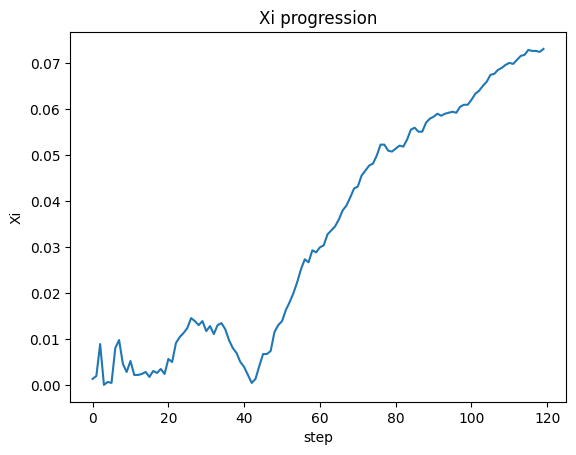

xi_final 0.07313368055555555


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 96
T = 120
phi = np.random.randn(N, N) * 0.05
dt = 0.1
lam = 0.2
m2 = 0.0

def lap(u):
    return (np.roll(u,1,0)+np.roll(u,-1,0)+np.roll(u,1,1)+np.roll(u,-1,1)-4*u)

xis = []
for t in range(T):
    phi = phi + dt * (lap(phi) - m2 * phi - lam * phi**3)
    g = np.exp(1j * np.angle(phi + 1e-9))
    xi = np.abs(g.mean())
    xis.append(xi)

plt.figure()
plt.plot(xis)
plt.xlabel("step")
plt.ylabel("Xi")
plt.title("Xi progression")
plt.show()

print("xi_final", float(xis[-1]))
assert np.isfinite(xis).all()